# Daily data

In [1]:
import pandas as pd
import requests
import json

url_raw = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={CODE}&market=USD&apikey={API}'
API = '4V9Q4D5K86S9VDCW'

# codes = ['BTC', 'ETH', 'LTC', 'DASH', 'XRP']
codes = ['TRX', 'XMR', 'NEO', 'XEM', 'ZEC', 'REP', 'QTUM', ]

start_date = '2017-01-01'
end_date = '2019-03-24'
for code in codes:
    df = pd.DataFrame()
    url = url_raw.format(CODE = code, API = API)
    website_url = requests.get(url).json()
    
    df = pd.DataFrame.from_dict(website_url['Time Series (Digital Currency Daily)'], orient='index')
    df.index = pd.to_datetime(df.index)
    df = df.astype(float)
    
    for col in df.columns:
        if 'b' in col:
            df.drop(col, axis=1, inplace=True)
        else:
            column = col.split('. ')[1]
            df.rename(columns={col: column}, inplace=True)
    
    df = df.loc[start_date:end_date]

    name = '{CODE}.csv'.format(CODE = code)
    df.to_csv(name)

# Hourly data

In [7]:
import pandas as pd
import requests
import json
from datetime import datetime, timezone

class url_class:
    
    def __init__(self, CODE, CURR, LIMIT, API, LAST=None):
        self.code = CODE
        self.curr = CURR
        self.limit = LIMIT
        self.api = API
        self.last = LAST
    
    def url(self):
        if self.last == None:
            return 'https://min-api.cryptocompare.com/'\
                   'data/histohour?fsym={CODE}&tsym={CURR}'\
                   '&limit={LIMIT}&api_key={API}'.format(
                       CODE=self.code, CURR=self.curr,
                       LIMIT=self.limit, API=self.api
                   )      
        else:
            return 'https://min-api.cryptocompare.com/'\
                   'data/histohour?fsym={CODE}&tsym={CURR}'\
                   '&limit={LIMIT}&toTs={LAST}&api_key={API}'.format(
                       CODE=self.code, CURR=self.curr,
                       LIMIT=self.limit, API=self.api,
                       LAST=self.last
                   )       
        
        
codes = ['BTC', 'ETH', 'LTC', 'DASH', 'XRP']
CURR = 'USD'
LIMIT = 2000
API = '04d17b57169e15d4d02c00e0f4a94370a8c46494c45f1568752e7feee315078f'
# Last date
dt = datetime(2019, 3, 20)
timestamp = dt.replace(tzinfo=timezone.utc).timestamp()


hours = []
prices = {code: [] for code in codes}

# url = url_(CODE, CURR, LIMIT, API)
# url.last = timestamp
for CODE in codes:
    url = url_class(CODE, CURR, LIMIT, API)
    hours = []
    print(url.last)
    for i in range(2):
        if url.last == None:
            data = requests.get(url.url()).json()
            for item in data['Data']:
                hours += [item['time']]
                prices[CODE] += [item['open']]
            url.last = hours[0] - 3600
        else:
            data = requests.get(url.url()).json()
            new_hours, new_prices = [], []
            for item in data['Data']:
                new_hours += [item['time']]
                new_prices += [item['open']]

            prices[CODE] = new_prices + prices[CODE]
            hours = new_hours + hours

            url.last = hours[0] - 3600

datetimes = []
for hour in hours:
    datetimes.append(datetime.utcfromtimestamp(hour))
    
for code in codes:
    name = '{CODE}_hour_test.csv'.format(CODE = code)
    pd.DataFrame(data=prices[code], index=datetimes).to_csv(name)

None
None
None
None
None


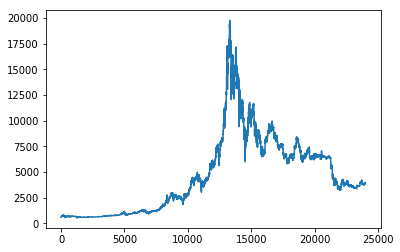

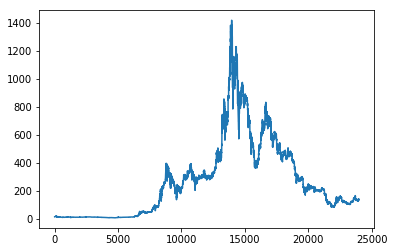

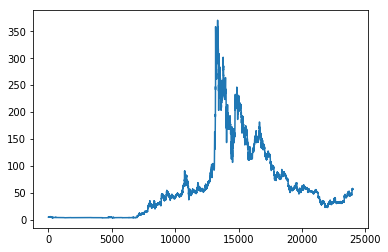

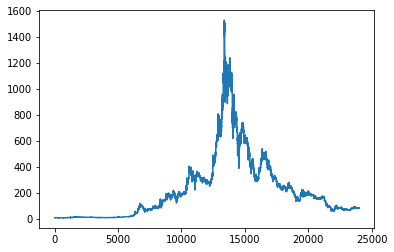

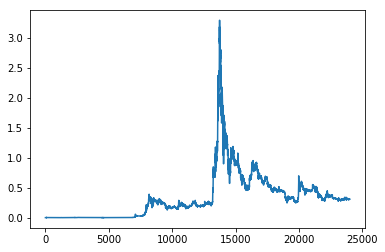

In [234]:
import matplotlib.pyplot as plt

for code in codes:
    plt.plot(prices[code])
    plt.show()